# Fonis Datageeks
## Wokshop: Exploratory Data Analysis
### 4. Vizualizacija podataka. Matplotlib i Seaborn
Pripremio: [Dimitrije Milenković](https://www.linkedin.com/in/dimitrijemilenkovicdm/)
<br>dimitrijemilenkovic.dm@gmail.com
***

U data science-u termin *vizualizacija podataka* nije namenjen za pravljenje lepih grafika za izveštaje ili pravljenje *dashboarda* za rukovodioce i šefove. Vizualizacija podataka u ovom polju se koristi gotovo svakodnevno i u svim fazama projekta i <a href='https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining' target='_blank'>CRISP-DM</a> metodologije.

Više puta je rečeno da obično prvi korak kojim svi težimo kada dobijemo novi projekat jeste da razumemo podatke, a najlakši način jeste vizuelnim pregledom. To najčešće postižemo crtanjem grafika ili prikazivanjem tabela koje sumarizuju specifične podatke, odnosno izuzimajući podatke koje nas ne interesuju u tom trenutku. Jednostavno, nama ljudima je lakše da uočimo ključne stvari gledajući sliku nego posmatrajući redove u skupu podataka.

Neretko, vizualizujemo i uspešnost prediktivnog modela ili delove modela. Ukratko, vizualizacija je relativno brz način da proučimo skup podataka koji imamo, pa je tako veoma bitna i u eksplorativnoj analizi. Pakete koje ćemo pokazati su `pandas`, `matplotlib` i `seaborn`.

Osnovni paket za vizuelizaciju u Pythonu je **matplotlib**. Možete ga instalirati komandom:
<br>[conda install -c conda-forge matplotlib ](https://anaconda.org/conda-forge/matplotlib)


Pomoću ovog moćnog paketa možemo napraviti bilo koju vizualizaciju koja nam padne na pamet. S obzirom da je tako moćan i detaljan, pretpostavljate da je i kompleksan. Zbog toga je nad njim razvijen drugi popularni paket, **seaborn**. Osnovni izgled grafika u seabornu je daleko lepši od matplotlibovih, a pored toga seaborn nam je omogućio brzim i jednostavnim neke kompleksne vizualizacije za koje je bilo potrebno mnogo matplotlib podešavanja. Seaborn možete instalirati sledećom komandom: 
<br>[conda install -c anaconda seaborn](https://anaconda.org/anaconda/seaborn)

Pre učitavanja podataka inicijalizovaćemo okruženje za vizuelizaciju.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

U prethodnom delu počeli smo sa istraživanjem dataseta o marketinškoj kampanji Portugalske banke, pa ćemo sa tim i nastaviti:

In [3]:
df = pd.read_csv('data/bank/bank-additional.csv', delimiter=';') 
df.head()

,age,job,marital,education,default,housing,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,...,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,...,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,...,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,...,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,...,-0.1,93.200,-42.0,4.191,5195.8,no


Poslednja kolona je, ako se sećamo, ciljna kolona (ciljni atribut, izlaz, eng. *target*, *label*) koji želimo da predvidimo (ali o predviđanju više od sledeće radionice).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


Vizualizacije možemo da podelimo po tome koliko atributa posmatramo.

## Vizualizacija jednog atributa (eng. Univariate visualization)

Kao što naziv kaže, posmatra se samo jedan atribut, nezavisno od vrednosti drugih atributa. Međutim, nije dovoljno da podelimo vizualizacije samo po broju atributa, moramo da ih podelimo i po tipu podatka.

### Numerički atributi

Numerički ili kvantitativni atributi predstavljaju vrednosti nastale kao broj pojavljivanja određene pojave ili kao rezultat merenja. 

Prvi i najčešći grafici su **histogrami**. Za to je dovoljno da za izabranu kolonu pozovete `hist()`.

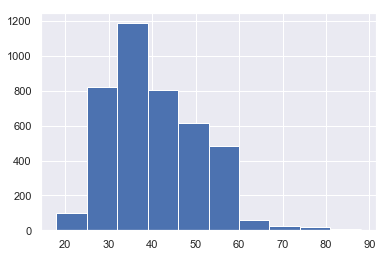

In [5]:
df['age'].hist(bins=10)

Moguće je prikazati i veći broj histograma istovremeno selekcijom većeg broja kolona.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19a11cc668>,
      dtype=object)

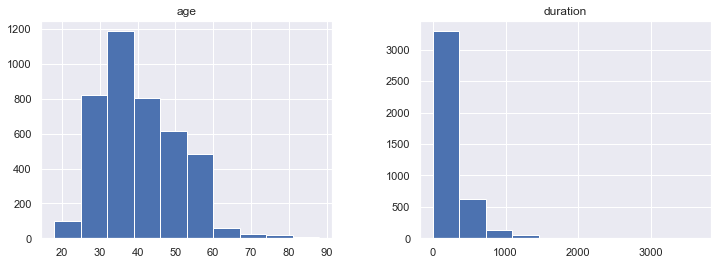

In [6]:
df[['age', 'duration']].hist(figsize=(12, 4))

Histogrami grupišu vrednosti u *binove* jednake širine. Standardno, biblioteka sama odlučuje koja je veličina bina na osnovu podataka koje joj pošaljemo. Međutim, ako želimo detaljniji ili generičkiji uvid u atributu, opciono, možemo dodati parametar kojim definišemo broj binova. Većim brojem binova smanjujemo interval obuhvaćen jednim binom i detaljnije sagledavamo atribut i obrnuto. 

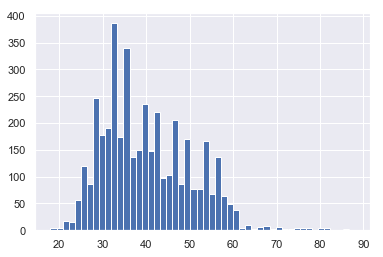

In [7]:
df['age'].hist(bins=50)

Na osnovu prethodnih histograma imamo uvid u podatke koje opisuju *starost* korisnika i *trajanje poziva*. Bilo bi dobro i da sagledamo ekonomsku situaciju u kojoj su se dešavale kampanje ove banke:

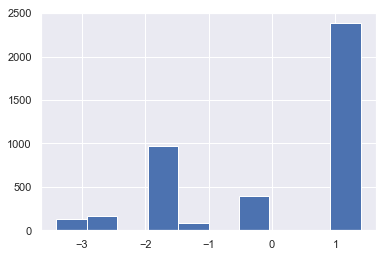

In [8]:
df['emp.var.rate'].hist()

Primetimo da je marketing ove banke navikao da radi u uslovima blage pozitivne fluktuacije radnika (više zapošljavanja) ali ne i pri naglim zapošljavanjima. Jače varijacije dešavale su se ka negativnim fluktuacijama radnika (otpuštanja, napuštanja posla), ali one nisu bile toliko česte.

Takođe, ovaj parametar iako numerički uzima tek nekoliko vrednosti. Razlog za to je što se on meri kvartalno, pa sve obzervacije u jednom kvartalu imaju istu vrednost ovog parametra.

Histogrami se uglavnom koriste za otkrivanje distribucije podataka, ali i za otkrivanje anomalija ili izuzetaka u podacima.

Specifičan slučaj histograma, odnosno *glatki histogram* se može koristiti za lepši prikaz distribucije. To su tkz. **grafici gustine** (eng. density plots). Za razliku od histograma oni nemaju binove (zato se i zovu glatki histogrami). Njih dobijamo pozivanjem metode `plot()` i prosleđujemo u parametar `kind` vrednost `density`. Parametar `sharex` predstavlja parametar kojim se kontroliše da li grafici dele x osu, a `layout` kako će grafici biti poređani (prva vrednost je broj kolona, a druga broj redova).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19a0f59710>,
      dtype=object)

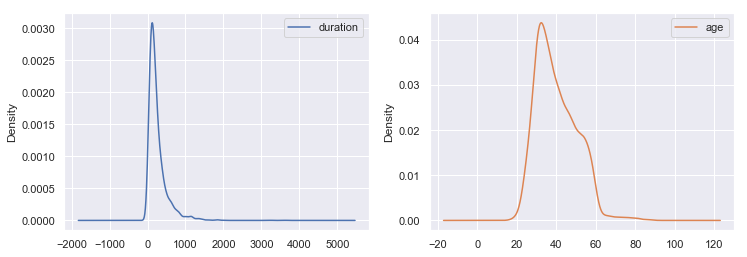

In [9]:
df[['duration', 'age']].plot(kind='density', 
                             subplots=True, sharex=False, 
                             layout=(1,2), figsize=(12,4))

Na početku je pomenuto da nam paket `seaborn` omoućava lakim neke naprednije vizualizacije. Pomoću njega možemo da prikažemo i histogram i grafik gustine na jednom plotu.

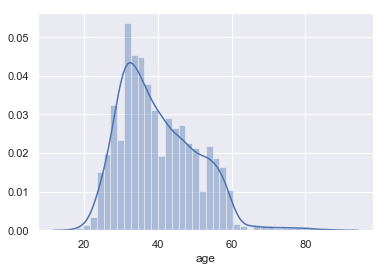

In [10]:
sns.distplot(df['age'])

Reklo bi se da godine podležu normalnoj raspodeli sa dužim desnim repom. Kod takvih raspodela, *medijana je manja od aritmetičke sredine (mean)* jer imamo veliki broj mladih ispitanika, ali je prosek veći upravo zbog desnog repa - imamo veoma stare ispitanike, to jest jako velike vrednosti u skupu.

Postoji jedna bitna razlika između histograma i grafika gustine. Naime, y osi kod histogtama predstavlja _broj elemenata_ koji pripadaju jednom binu, a kod grafika gustine y osa predstavlja _gustinu_. Naizgled deluje da su zbog toga neuporedivi. Međutim, očigledno je da predstavljaju iste pojave.

Drugi, veoma često korišćeni, grafik **jeste box plot**. Koristićemo `seaborn` za prikaz box plotova.

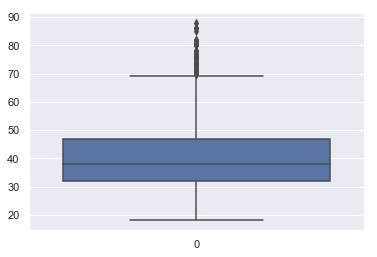

In [11]:
sns.boxplot(data=df['age'])

Očigledno je da je potrebna mala pomoć pri interpretaciji grafika. Osnova jeste pravougaonik (zbog toga i naziv box). Pravougaonik se tumači tako da donja linija predstavlja prvi kvartil (25 percentil), odnosno vrednost ispod koje se nalazi četvrtina skupa podataka. Gornja linija predstavlja treći kvartil (tri četvrtine podataka se nalazi ispod tog broja). Sam pravouganik opisan je merom *IQR (Interquartile Range)* koja se računa kao: $$Q3-Q1$$
<br>Linija koja se nalazi unutar pravougaonika je medijana (polovina skupa podataka je ispod te vrednosti). Linije ispod i iznad pravougaonika predstavljaju najnižu i najvišu vrednost posmatranog atributa, dok tačke iznad najviše vrednosti i ispod najniže predstavljaju izuzetke (eng. outliers).
<br>Izuzeci su sve tačke (zapis podatka) koje su veće od $$Q3+1.5*IQR$$ ili manje od $$Q1-1.5*IQR$$.

![boxplot](img/boxplot.png)

Na osnovu većeg gornjeg brka možemo zaključiti da imamo jako stare korisnike u skupu podataka.


Prilikom analize podataka često se zameralo box graficima to što širina pravougaonika ne znači apsolutno ništa. Zbog toga je smišljen poseban grafik koji se naziva **violina grafik**. On dodaje značenje širine tako što će širina predstavljati gustinu podataka.

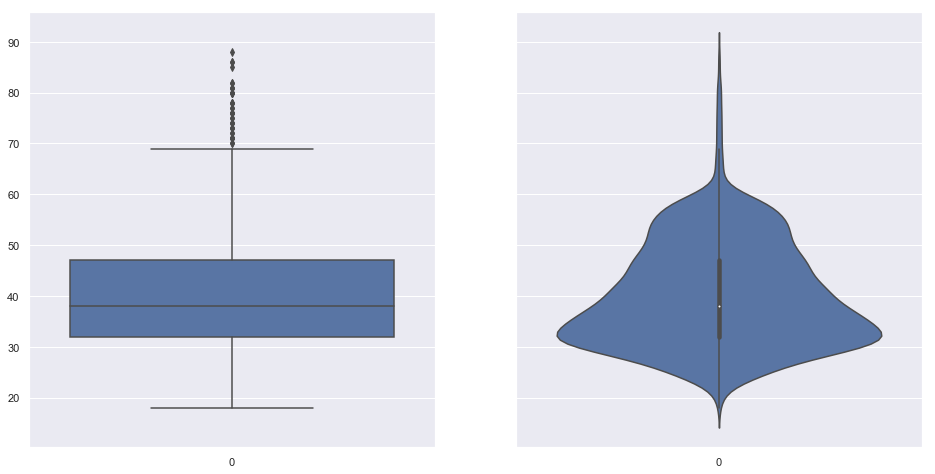

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 8)) # ova linija nam pomaze da iscrtamo dva grafika jedan do drugog, sa deljenom y osom, širine 16 i visine 8

sns.boxplot(data=df['age'], ax=axes[0])
sns.violinplot(data=df['age'], ax=axes[1])

PODSETNIK: Deskriptivne statistike o samom atributu možemo dobiti pozivanjem `describe`. Izlazi su prilično samo-objašnjivi.

```Python
df[atribut].describe()
```

### Kategorički atributi

Kategorički atributi su atributi koji imaju fiksiran broj mogućih vrednosti. Vrednosti ne moraju nužno da budu tekstualne, mogu biti i numeričke (to znači da treba čitati opis podataka). Dakle, jedan red u skupu podataka za takav atribut može da ima samo jednu od ponuđenih vrednosti. Specijalan slučaj kategoričkih atributa su binarni atributi, odnosno atributi koji imaju samo dve moguće vrednosti (`y` to jest da li je klijent potpisao ugovor ili ne, pol može biti muški ili ženski, i slično).

Prva stvar koju ćemo prikazati nije grafik, već **tabela frekvencija**, koja je već korišćena u prethodnom delu. Za to koristimo  funkciju `value_counts()` nad DataFrame-om u kome se nalaze podaci. Rezultati su uvek sortirani od najčešćeg pojavljivanja ka najređem. Naravno, ovu metodu je moguće primeniti i na numeričkim atributima, ali je pitanje smislenosti. 

Na primer, želimo da vidimo koliko ljudi radi koji posao. 

In [13]:
df['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

Grafički prikaz tabele frekvencija se naziva **bar grafik**. Najjednostavniji način da se napravi bar grafik jeste primenom `seaborn` paketa i funkcije `countplot()`.

Želimo da prikažemo broj poziva po tome kome su upućeni -- da li klijenti imaju kredit i koji posao obavljaju. Takođe, želimo da prikažemo broj poziva po vremenu kada su se desili -- po mesecu i danu u nedelji.

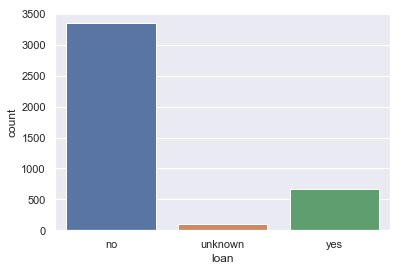

In [14]:
sns.countplot(x='loan', data=df)

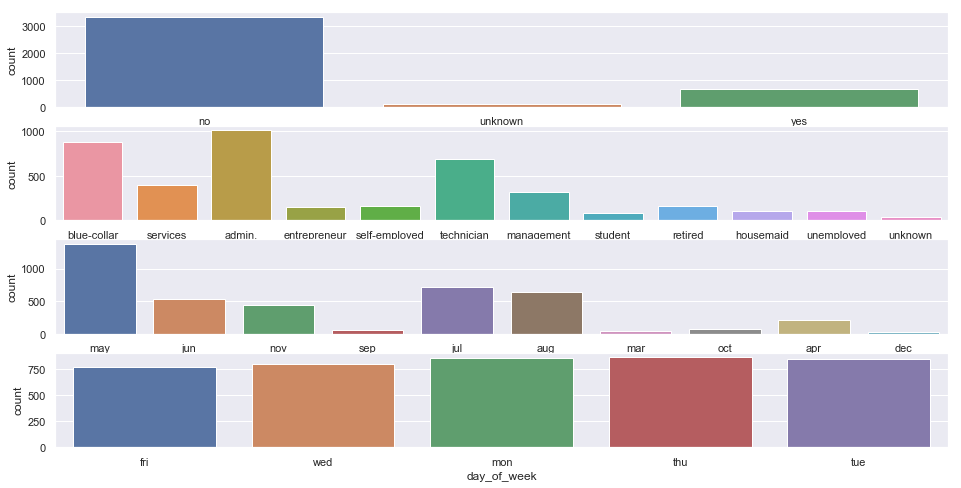

In [15]:
_, axes = plt.subplots(4, 1, figsize=(16, 8))

sns.countplot(x='loan', data=df, ax=axes[0])
sns.countplot(x='job', data=df, ax=axes[1])
sns.countplot(x='month', data=df, ax=axes[2])
sns.countplot(x='day_of_week', data=df, ax=axes[3])


Iako histogram i bar grafik deluju slično (možda i isto) postoje razlike. Naime, histogram služi za prikaz numeričkih atributa i sam razbija vrednosti u binove, dok bar grafik već ima kategorije. Binovi su podeljeni u rastućem redosledu, dok kategorije obično nemaju relaciju poretka.

## Vizualizacija sa više atributa

Za razliku od jednog atributa sada imamo kombinacije tipova podataka. 

### Numerički-numerički atributi

Bitna osobina atributa jeste njihova međusobna zavisnost. Zavisnost, to jest *korelacija* dva atributa opisuje koliko je rast vrednosti jednog uticao na rast ili pad vrednosti drugog atributa. Grafički korelacija se najčešće prikazuje **heatmap-ama**. Njih prikazujemo tako što izračunamo korelacije u skupu podataka i pozovemo `heatmap()` iz paketa `seaborn`. Napomena, prvo moramo da izvučemo numeričke atribute.

In [16]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

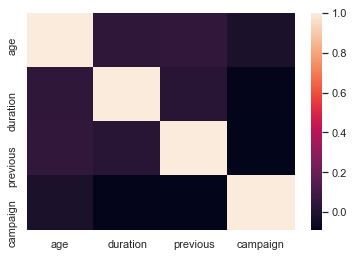

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # svi numericki tipovi u pandasu, mi trenutno imamo samo int64 i float64
numeric_df = df.select_dtypes(include=numerics)


corr_matrix = df[['age', 'duration','previous', 'campaign']].corr(method='pearson')
# corr_matrix = numeric_df.corr(method='pearson') # SKRIVENI DOMACI ZA NAJJACE: izguglaj i objasni razliku izmedju metoda pearson, kendall i spearman

sns.heatmap(corr_matrix)

In [18]:
corr_matrix

,age,duration,previous,campaign
age,1.000000,0.041299,0.050931,-0.014169
duration,0.041299,1.000000,0.025724,-0.085348
previous,0.050931,0.025724,1.000000,-0.091490
campaign,-0.014169,-0.085348,-0.091490,1.000000


Crna vrednost odgovara niskim vrednostima korelacija dok svetlije vrednosti predstavljaju više vrednosti korelacija. Iz ovih podataka vidimo jake korelacije atributa `cons.price.idx` i `euribor3m`: euribor označava prosečnu stopu kamata koje evropske banke nude na međubankarskom tržištu, a cons.price.idx indeks potrošačkih cena. U slučaju kada rastu potrošačke cene, povećava se tražnja za novcem, tj. kreditima pa tako se povećava i kamatna stopa jer postoji veća tražnja.

Ipak, najčešći grafik koji prikazuje dva numerička atributa je **raštrkani grafik** (eng. *scatter plot*). On je prilično jednostavan i intuitivan. Naime, na jednu osu se stavi jedan atribut, na drugu drugi. Zatim se za svaki red u skupu podataka prikazuje tačka na grafiku sa vrednostima tog reda. Njega pozivamo funkcijom `scatter()` iz `matplotlib` paketa. 

Text(0, 0.5, 'euribor')

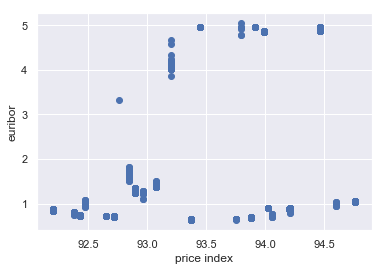

In [19]:
plt.scatter(df['cons.price.idx'], df['euribor3m'])
plt.xlabel('price index')
plt.ylabel('euribor')

Text(0, 0.5, 'Duration of call')

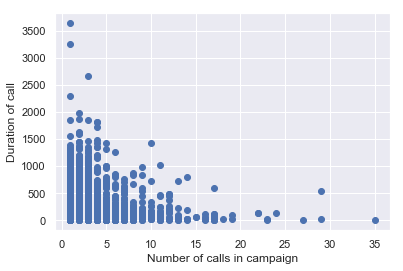

In [20]:
plt.scatter(df['campaign'], df['duration'])
plt.xlabel('Number of calls in campaign')
plt.ylabel('Duration of call')

Sa drugog grafika vidimo da kako raste broj poziva tako opada trajanje poziva, što je jasno jer je korisnik već upoznat sa ponudom pa razgovor ne traje dugo. Šta vidimo sa prvog grafika? Okači komentar sa mišljenjem u grupi ili mi pošalji u poruci. :)

Ipak, ovi grafici ne pokazuju veliku korelaciju u podacima. Da bismo ilustrovali kako izgleda velika povezanost, možemo opet napraviti novi atribut koji opisuje koliko puta smo ukupno do sada zvali određeneg klijenta.


In [21]:
df['calls'] = df['previous'] + df['campaign']

Text(0, 0.5, 'Total number of calls')

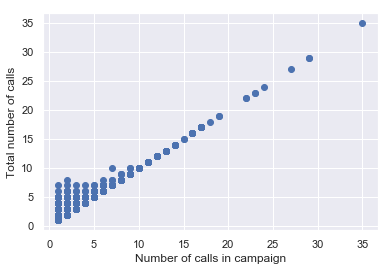

In [22]:
plt.scatter(df['campaign'], df['calls'])
plt.xlabel('Number of calls in campaign')
plt.ylabel('Total number of calls')

Vidimo da u ovom slučaju imamo pravu liniju, što znači da kako se povećava broj poziva u ovoj kampanji tako se povećava i ukupan broj poziva jer je to atribut koji je izveden iz prvog.

Kada imamo mali broj atributa, obično želimo da prikažemo sve moguće raštrkane grafike, a da smanjimo broj linija koda koji moramo da napišemo. Zbog toga je napravljena metoda `pairplot()`.

In [23]:
df.shape

(4119, 22)

In [24]:
small_df = df.sample(1000)

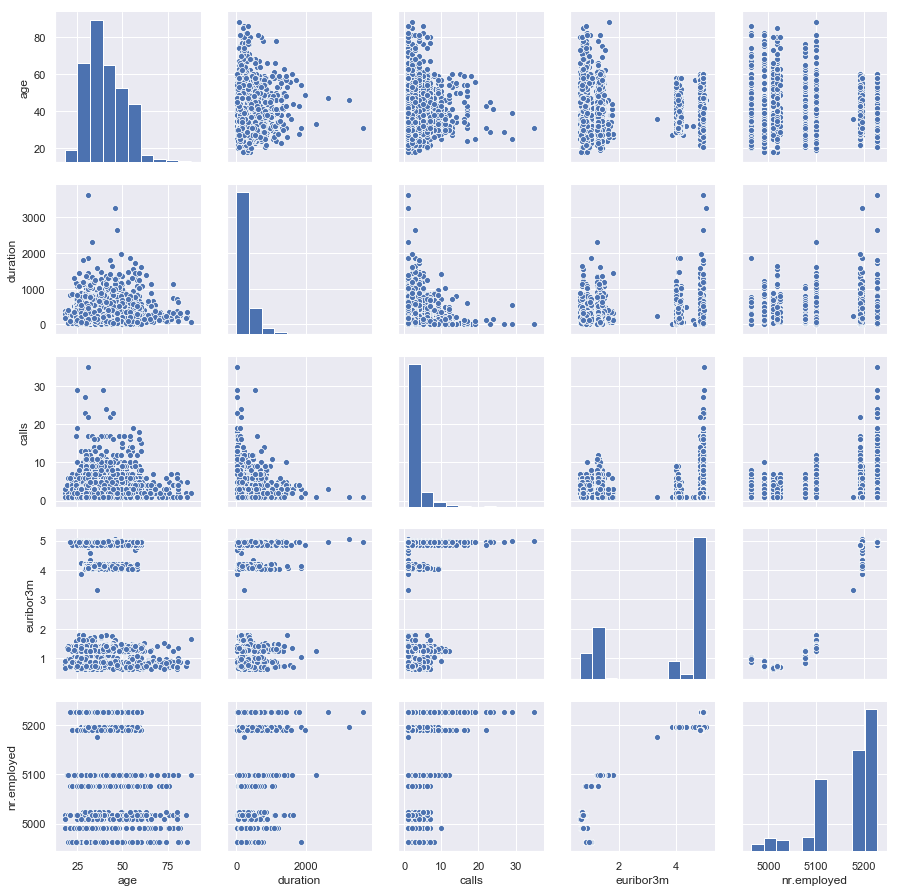

In [25]:
sns.pairplot(df[['age', 'duration', 'calls','euribor3m', 'nr.employed']]) 

Primetite da je jedan red jedan atribut, a isto tako da je u jednoj koloni uvek jedan atribut. Sa ovog grafika možemo analizirati odnos bilo koja dva numerička atributa.

Neretko želimo pored raštrkanog grafika da prikažemo i distribucije svakog atributa pojedinačno, ali sve na istoj slici. Paket `seaborn` je mislio i u tom smeru te je napravio metodu `jointplot`.

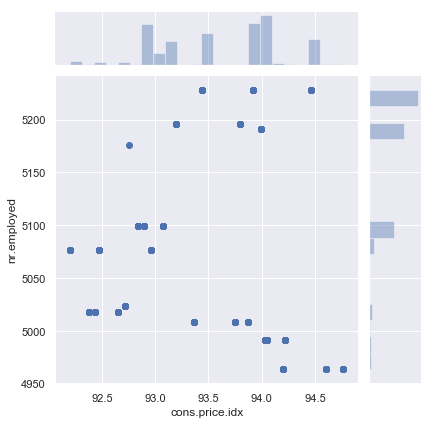

In [26]:
sns.jointplot(x='cons.price.idx', y='nr.employed', data = df, kind = 'scatter')

Međutim, nismo ograničeni samo na raštrkani grafik. Možemo da prikažemo i izohipse (tačnije gustinu podataka) samo menjanjem vrednosti jednog parametra, tj. kada bi umesto `scatter` u parametri `kind` stavili `kde`.

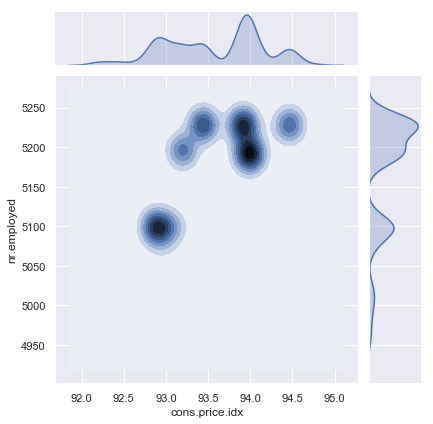

In [27]:
sns.jointplot(x='cons.price.idx', y='nr.employed', data = df, kind = 'kde')

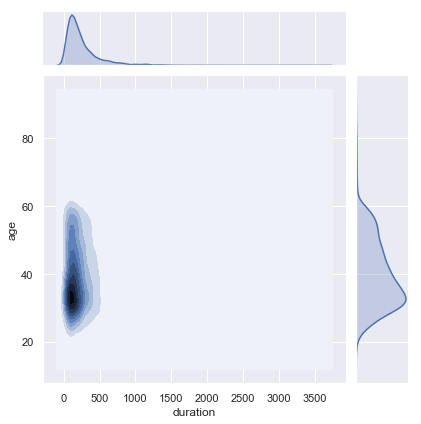

In [28]:
sns.jointplot(x='duration', y='age', data = df, kind = 'kde')

Sa prethodnog grafika vidimo da je najviše korisnika od 30-40 godina koji pričaju manje od 5 minuta (300 sekundi).

### Numerički-kategorički atributi

Često nas, naročito kod problema klasifikacije (sledeća radionica), interesuje odnos kategoričkog i numeričkog atributa. Pitanja su obično tipa da li su vrednosti veće ili niže za jednu kategoriju itd. Način na koji ćemo dobiti takve informacije su obično dodavanjem podatka o kategorijama slučajeva na već pokazane grafika.

U ovom skupu podataka problem se može definisati kao: _predvideti da li će klijent potpisati ugovor o štednji u banci ili ne_ (kolona `y`). Probaćemo da dodamo tu informaciju na raštrkani grafik koji smo već napravili. Međutim, umesto postojeće metode koristićemo metodu `lmplot()` i kroz parametar `hue` ćemo dodati podatak da li je korisnik odlučio da potpiše ugovor.

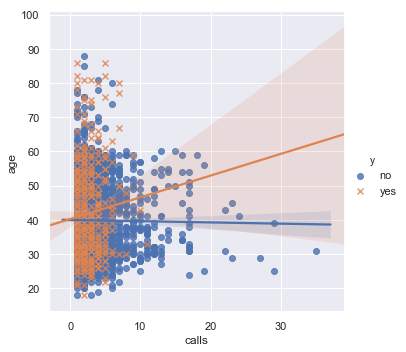

In [29]:
sns.lmplot('calls', 'age', data=df, hue='y', markers=["o", "x"])

Kao što vidimo dodali smo boju na raštrkani grafik. Zelene tačke predstavljaju korisnike koji su oročili novac na štednju, a plave korisnike koji nisu. Sa prvog grafika, vidimo da su se stariji korisnici odlučivali za štednju u slučaju kada su više puta kontaktirani. 

Možemo proveriti kako je nezaposlenost uticala na štednju: dodajmo informaciju o otvaranja računa za štednju na box plot nezaposlenosti. Dakle, kao parametar `x` metode `boxplot` dodaćemo kategorički atribut, odnosno naš `y`. 

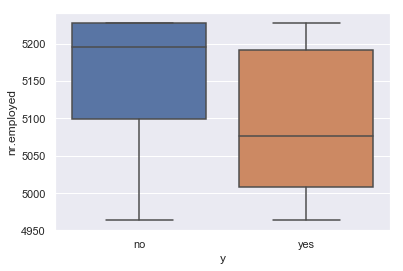

In [30]:
sns.boxplot(x='y', y='nr.employed', data=df)

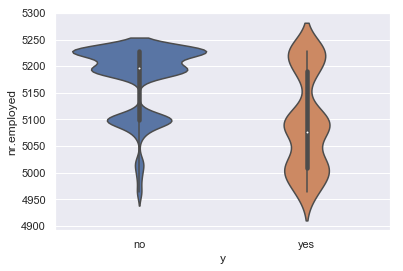

In [31]:
sns.violinplot(x='y', y='nr.employed', data=df)

Vidimo da se znatno više ljudi odlučivalo za štednju pri manjoj nezaposlenosti. Zelena boja (`y` = `yes`) ima manje vrednosti od plave boje. 

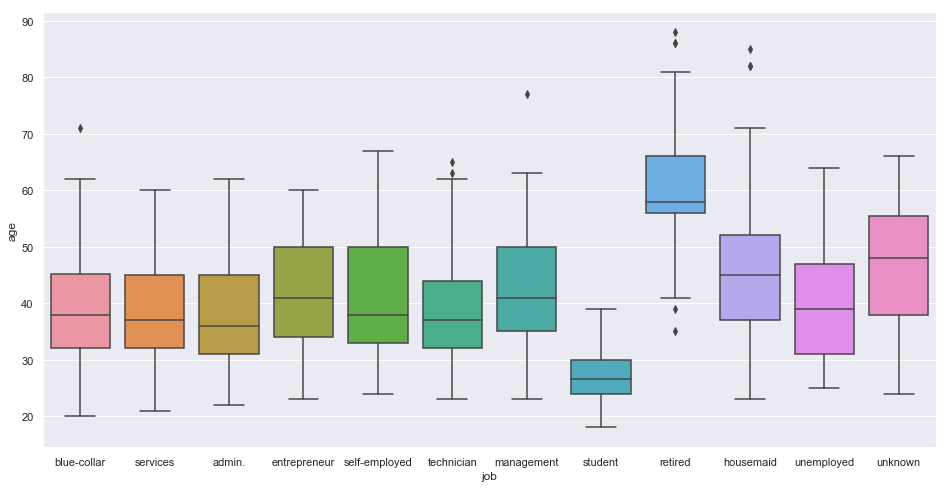

In [32]:
rcParams['figure.figsize'] = 16,8 # velicina grafika
sns.boxplot(x='job', y='age', data=df)

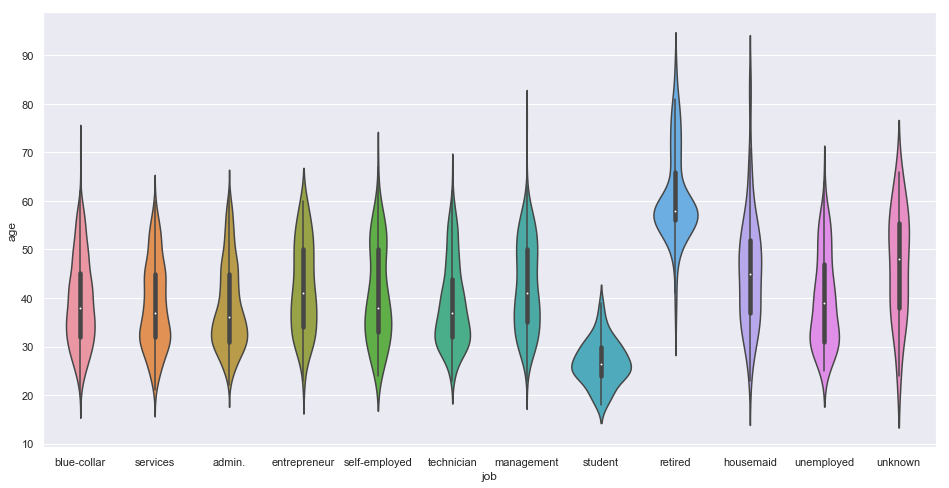

In [33]:
sns.violinplot(x='job', y='age', data=df)

Da se vratimo na box grafik. Naime, u `seaborn` paketu imamo metodu `catplot` koja omogućava prikazivanje box grafika po vrednostima trećeg atributa. To nam omogućava da lako proverimo koliko se razlikuju po starosti klijenti koji su uzimali kredit i otvaraju račun za štednju od onih koji nisu uzimali kredit i otvaraju račun za štednju. Odnosno, možemo da prikažemo box grafike za `y` i `age` po tome da li su već uzimali kredit ili ne.

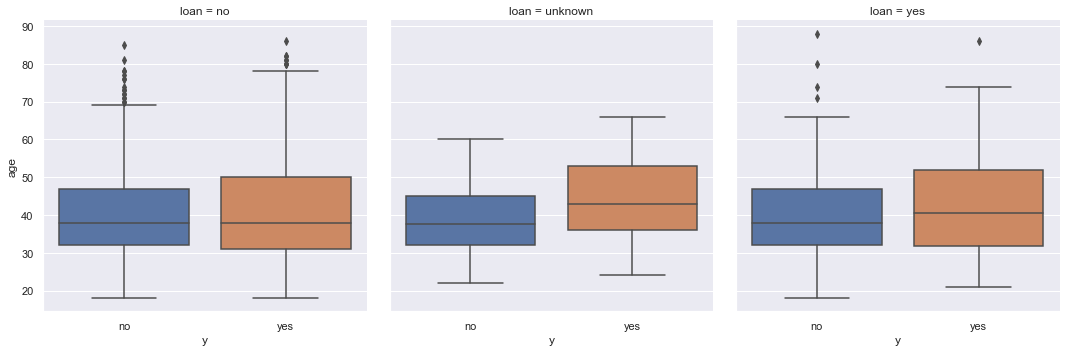

In [34]:
sns.catplot(x='y', y='age', col='loan', data=df, kind='box')

### Kategorički-kategorički atributi

Na kraju, ostaje nam da prikažemo vizualizacije gde imamo dva kategorička atributa. Najčešće koristićemo broj pojavljivanja po kategoriji, odnosno `countplot()`, gde ćemo dodati parametar `hue`.

Recimo da nas interesuje da li obrazovanje utiče na to da li klijenti štede ili ne.

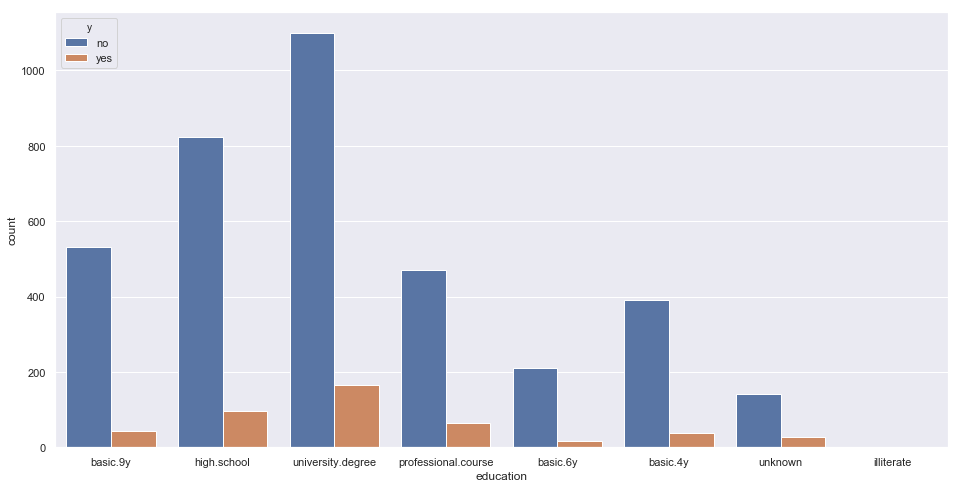

In [35]:
sns.countplot(x='education', hue='y', data=df)

Vidimo da mnogo češće štede ljudi višeg stepena obrazovanja. 

Pored prikazanih grafika postoji veliki broj drugih. Svi zahtevaju vreme i energiju kako bi se protumačili i koristili. Međutim, često se koriste i tabelarni prikazi koje su pomenuti u prethodnom tutorijalu. Pre svega misli se na `crosstab`:

In [36]:
pd.crosstab(df['y'], df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,391,211,531,824,1,470,1099,141
yes,38,17,43,97,0,65,165,26


ali i na `groupby`:

In [37]:
df.groupby(['y'])['campaign'].agg([np.mean])

,mean
y,
no,2.605780
yes,1.980044


## Literatura:

Ovaj tutorijal zasnovan je na sledećim materijalima:
> 1. Materijali sa predmeta [Mašinsko učenje FON](http://odlucivanje.fon.bg.ac.rs/predmeti/osnovne-studije/masinsko-ucenje/): 1. Vizualizacija podataka u Python-u, Sandro Radovanović
> 2. Kaggle Kernel - [ML Bank Marketing Solution](https://www.kaggle.com/mayurjain/ml-bank-marketing-solution)
> 3. [Open Machine Laerning Course Medium](https://medium.com/open-machine-learning-course)

Korišćen je sledeći dataset:
> [Bank Marketing](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)